# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [12]:
#import JSONs as Pandas DataFrame and inspect the dataset using .head()
import pandas as pd
df=pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


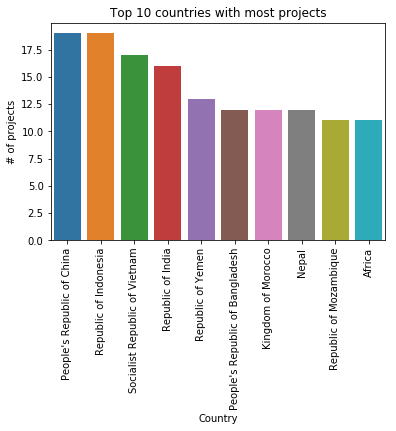

In [13]:
#Question1: find the 10 countries with most projects

#note each entry(row) corresponds to a project, therefore counting the number of rows for each country will do

#import relevant packages for plotting the result
import matplotlib.pyplot as plt
import seaborn as sns

#use .dropna() to discard any missing data
#use .value_counts() to count the number of times each country occurs
#use .head(10) to extract the top 10 countries with most projects
s=df.countryname.dropna().value_counts().head(10)
#display the result
print(s)

#plotting the result
sns.barplot(x=s.index, y=s)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('# of projects')
plt.title('Top 10 countries with most projects')
plt.show()

[(223, 'Environment and natural resources management'), (202, 'Rural development'), (197, 'Human development'), (184, 'Public sector governance'), (158, 'Social protection and risk management'), (130, 'Financial and private sector development'), (122, ''), (119, 'Social dev/gender/inclusion'), (72, 'Trade and integration'), (47, 'Urban development')]


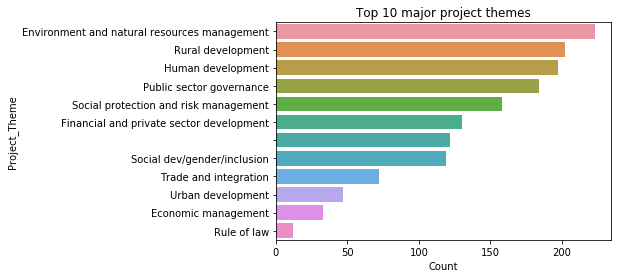

In [14]:
#Question2: find the top 10 major project themes (using column 'mjtheme_namecode')

#use df.mjtheme_namecode.head() to check the content, which is a list of dictionaries with the themename under key'name' in the dict. 
#note that each project(row) may have multiple themes, corresponding to multiple dictionaries stored in a list under 'mjthem_namecode', need to extract all themes. 
#loop over each list to count all themes
#disclaimer: in this question, the missing name of the theme is not counted; to include the missing names, use the new dataframe created in Question3 instead. 

#import relevant packages
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

#initialize a defaultdict to count the frequency of each theme
theme_count=defaultdict(int)

#loop over each list to count all themes
for entry in df.mjtheme_namecode:
    for theme in entry:
        theme_count[theme['name']] +=1

#rank theme frequency in descending order
theme_rank=sorted([(v,k) for (k,v) in theme_count.items()], reverse=True)

#display the top 10 themes and their occurances
print(theme_rank[:10])

#plotting the result
rank=pd.DataFrame(theme_rank)
rank.columns=['Count','Project_Theme']
sns.barplot(x='Count',y='Project_Theme',data=rank,orient='h')
plt.title('Top 10 major project themes')
plt.show()

In [15]:
#Question3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
#need to loop over the list of themes in 'mjtheme_namecode' column to generate a dictionary storing the code-name correspondance
#loop over the list of themes again and use this correspondance dictionary to fill in missing theme names by their theme code

#create a dictionary to store the correlation between theme code and theme name
code_lookup={}
#create a flag variable to indicate if there exists one-to-many correspondance between theme code and theme name
flag=False

#loop over each list in 'mjtheme_namecode' column to generate the code_lookup dictionary
for entry in df.mjtheme_namecode:
    for theme in entry:
        #skip missing theme names 
        if theme['name'] == '':
            continue
        #log new code-name pairs in the code_lookup dictionary
        elif theme['code'] not in code_lookup:
            code_lookup[theme['code']] = theme['name']
        #if the theme code already exists, and its corresponding theme name is different, set flag=True to indicate one-to-many corespondance    
        elif theme['name'] != code_lookup[theme['code']]:            
            flag=True
    
#print the code_lookup dictionary to doublecheck
print(code_lookup)

#if flag is True, print warning messages
if flag:
    print("Warnings: some theme codes correspond to multiple theme names")
    print("This program arbitrarily chooses one of the names to fill in the missing theme name.")

#create a new dataframe df_fill out of the original df
df_fill=df.copy(deep=True)

#use the code_lookup dict to fill in the missing theme name in the new dataframe df_fill
for entry in df_fill.mjtheme_namecode:
    for theme in entry:
        if theme['name'] == '':
            theme['name'] = code_lookup[theme['code']]

#print the updated df_fill to doublecheck
print(df_fill.mjtheme_namecode.head())

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}
0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object


# Message to mentor: problem noticed in the codes for solving Question3

use 'df_fill=df.copy(deep=True)' to create a copy of df, then update df_fill will also affect df due to the nested dictionary structure;

I also tried using 'import copy', then use 'df_fill=copy.deepcopy(df)' for creating a deep copy of df. But updating df_fill still affects df;

I'm currently not sure how to break the connection between df_fill and df completely. Help is appreciated. 